In [4]:

import numpy as np 
from sklearn.base import BaseEstimator,ClassifierMixin


In [5]:


class GaussianNaiveBase(BaseEstimator,ClassifierMixin):
    def __init__(self):
        pass 
    
    def fit(self,X,y):
        self.classes_ = np.unique(y)
        n_features = X.shape[1]
        n_classes = len(self.classes_)
        
        # storing mean,variance,prior
        self.mean_ = np.zeros(shape=(n_classes,n_features),dtype=np.float64)
        self.var_ = np.zeros(shape=(n_classes,n_features),dtype=np.float64)
        self.priors_ = np.zeros(n_classes,dtype=np.float64)
        
        # fetching data class by class, need=(axis=0)
        for idx,c in enumerate(self.classes_):
            X_c = X[y==c]
            self.mean_[idx,:] = X_c.mean(axis=0)
            self.var_[idx,:] = X_c.var(axis=0)
            self.priors_ = X_c.shape[0]/X.shape[0] # choosing_row / total_row
        return self 
        
        
    def predict(self,X):
        y_pred = [self._predict(x) for x in X]
        return y_pred 
            
        
    def _predict(self,X):
        posteriors = []
        for idx,c in enumerate(self.classes_):
            prior = np.log(self.priors_)
            likelihood = np.sum(np.log(self._pdf(idx,X)))
            posterior = prior + likelihood
            posteriors.append(posterior)
        return self.classes_[np.argmax(posteriors)]
    
            
    def _pdf(self,class_idx,x):
        mean = self.mean_[class_idx]
        var = self.var_[class_idx]
        numerator = np.exp(-(x-mean)**2/(2*var))
        denominator = np.sqrt(2*np.pi*var)
        return numerator/denominator
    
        

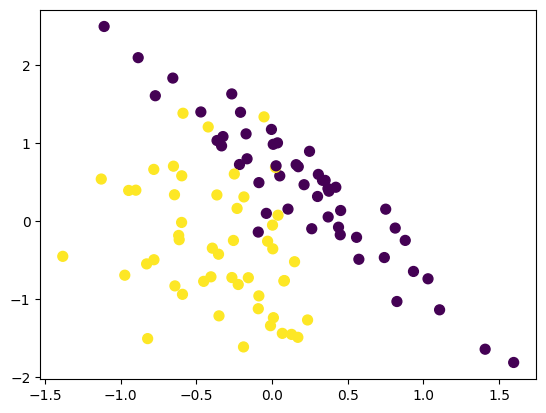

In [103]:
import seaborn as sns 
import matplotlib.pyplot as plt 

# test the alogirithrm with dataset:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X,y = make_classification(n_samples=100,
                          n_classes=2,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_repeated=0,
                          n_clusters_per_class=1,
                          class_sep=0.3,
                          random_state=40
                          )
plt.scatter(X[:,0],X[:,1],c=y,s=50)

In [104]:

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8)
X_train.shape,X_test.shape,y_train.shape,y_test.shape 

((80, 2), (20, 2), (80,), (20,))

In [105]:

naive_base_classifier = GaussianNaiveBase()
naive_base_classifier.fit(X_train,y_train)


GaussianNaiveBase()

In [ ]:


from sklearn.metrics import accuracy_score

y_pred = naive_base_classifier.predict(X_test)
accuracy_score(y_test,y_pred) *  100 


90.0

In [109]:

y_pred = naive_base_classifier.predict(X_train)
accuracy_score(y_train,y_pred) *  100 

92.5